##**Prediction of Aluminium wire rod physical properties**

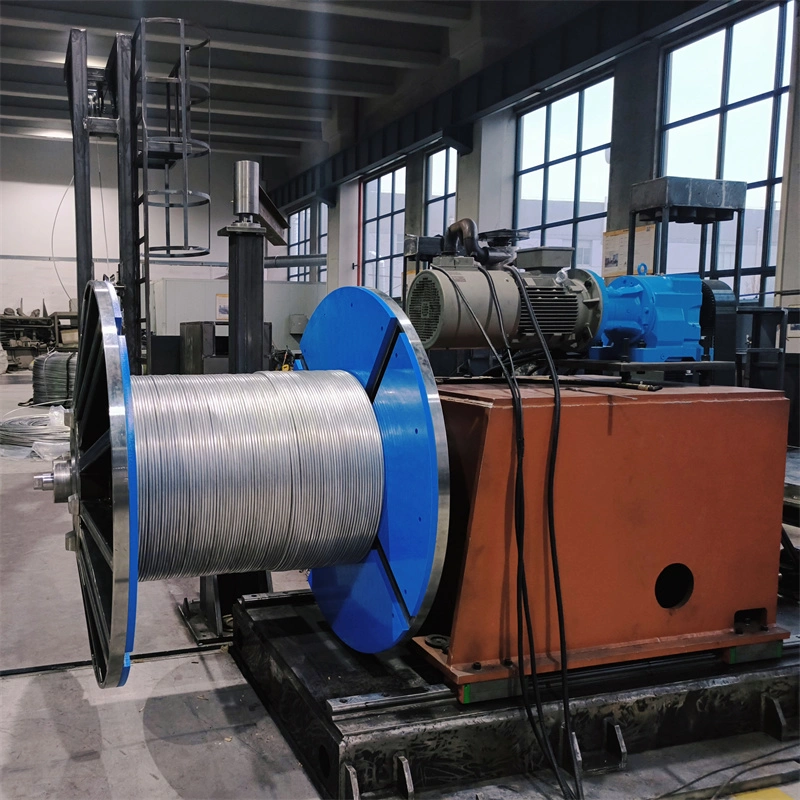

Auminium wire rod is produced in Wire rod mills of cast house, where an aluminium cast bar of trapezoidal cross section having area 3437 sq. mm is first casted and then further rolled by 15 nos. of stand in series to gradually reduce the cross section to obtain final 9.5 mm diameter rod. Description: The casting parameters that affects the wire rod properties like UTS, Elongation and Conductivity are dependent on chemical composition, casting temp. Cooling water temp. , Casting speed, Cast bar entry temperature at rolling mill, Emulsion temperature and pressure at rolling mill, Emulsion concentration and finally rod quench water pressure. These parameters are dynamic in nature and any deviation on one of the above affects the final rod properties. Expected Solution: Use of AI, ML or any modern technique to analyze those parameters and control them to effectively obtain the final desired parameters of the Wire rod produced.

##**Data Desciption**




### Dataset Description:
The dataset contains **11,000 rows** and the following key parameters related to aluminum wire rod production. Here is the statistical summary for each parameter:

1. **chemical_composition**: Ranges from 0.90 to 1.10 with a mean of 0.999, representing the variation in the alloy composition.
2. **casting_temp** (°C): Ranges from 650.0 to 749.9, with an average of 699.9°C.
3. **cooling_water_temp** (°C): Ranges from 20.0 to 59.9°C, with a mean of 40°C.
4. **casting_speed** (m/s): Ranges from 1.00 to 3.00 m/s, with an average of 1.99 m/s.
5. **entry_temp** (°C): Varies between 400.0 and 499.9°C, averaging 450.2°C.
6. **emulsion_temp** (°C): Varies between 20.0 and 79.9°C, with an average of 50.17°C.
7. **emulsion_pressure** (bar): Ranges from 0.50 to 2.00 bar, with an average of 1.25 bar.
8. **emulsion_concentration** (%): Varies between 3.00% and 10.00%, with a mean of 6.50%.
9. **rod_quench_pressure** (bar): Ranges from 2.00 to 6.00 bar, with an average of 3.99 bar.

### Target Variables (Outcomes):
1. **UTS** (Ultimate Tensile Strength in MPa): Varies from 128.4 to 139.6 MPa, with a mean of 133.99 MPa.
2. **elongation** (%): Ranges from 8.77% to 12.82%, with an average of 10.77%.
3. **conductivity** (% IACS): Conductivity varies between 43.18% and 48.43%, with a mean of 46.10%.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [27]:
df = pd.read_csv('edited_aluminium_data.csv')

In [28]:
df

,chemical_composition,casting_temp,cooling_water_temp,casting_speed,entry_temp,emulsion_temp,emulsion_pressure,emulsion_concentration,rod_quench_pressure,UTS,elongation,conductivity,rod_quality
0,0.959970,657.620099,48.686840,2.182599,433.498540,79.620419,0.785194,6.574484,2.879657,130.640477,11.186816,47.228850,-1
1,1.040920,711.691129,53.141757,1.526594,469.959123,35.222152,0.986792,8.350478,4.810734,135.298939,10.809325,46.462108,1
2,1.057989,650.444731,56.499446,2.490338,457.781378,30.020252,0.778450,9.028530,4.945150,132.665503,12.051507,47.576374,-1
3,0.972297,718.558292,46.861829,2.646371,471.479307,74.591692,1.644531,8.418320,3.920919,133.712514,11.179489,45.744490,1
4,0.949149,678.634795,47.271255,2.650129,446.115749,32.353430,1.878254,8.842814,2.744869,132.728558,9.835898,45.795808,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1.047581,650.367279,40.858117,2.646451,405.032473,74.081710,0.598601,5.335819,3.251743,131.808516,10.600772,47.590109,-1
10996,1.005488,723.807759,20.605119,2.751426,457.593822,66.279284,0.942063,4.521621,3.063462,135.635817,10.500276,45.928669,1
10997,0.967268,684.060580,32.679823,1.576996,428.095265,77.152797,0.927765,9.458707,4.142021,131.851253,10.388221,46.398634,1
10998,0.907773,746.259158,55.366785,1.933229,462.297872,51.287985,1.257977,8.175032,2.279584,135.607936,11.626576,45.174114,-1


In [29]:
df.isna().sum()

chemical_composition      0
casting_temp              0
cooling_water_temp        0
casting_speed             0
entry_temp                0
emulsion_temp             0
emulsion_pressure         0
emulsion_concentration    0
rod_quench_pressure       0
UTS                       0
elongation                0
conductivity              0
rod_quality               0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chemical_composition    11000 non-null  float64
 1   casting_temp            11000 non-null  float64
 2   cooling_water_temp      11000 non-null  float64
 3   casting_speed           11000 non-null  float64
 4   entry_temp              11000 non-null  float64
 5   emulsion_temp           11000 non-null  float64
 6   emulsion_pressure       11000 non-null  float64
 7   emulsion_concentration  11000 non-null  float64
 8   rod_quench_pressure     11000 non-null  float64
 9   UTS                     11000 non-null  float64
 10  elongation              11000 non-null  float64
 11  conductivity            11000 non-null  float64
 12  rod_quality             11000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [31]:
df.dtypes

chemical_composition      float64
casting_temp              float64
cooling_water_temp        float64
casting_speed             float64
entry_temp                float64
emulsion_temp             float64
emulsion_pressure         float64
emulsion_concentration    float64
rod_quench_pressure       float64
UTS                       float64
elongation                float64
conductivity              float64
rod_quality                 int64
dtype: object

In [32]:
df.head(5)

,chemical_composition,casting_temp,cooling_water_temp,casting_speed,entry_temp,emulsion_temp,emulsion_pressure,emulsion_concentration,rod_quench_pressure,UTS,elongation,conductivity,rod_quality
0,0.959970,657.620099,48.686840,2.182599,433.498540,79.620419,0.785194,6.574484,2.879657,130.640477,11.186816,47.228850,-1
1,1.040920,711.691129,53.141757,1.526594,469.959123,35.222152,0.986792,8.350478,4.810734,135.298939,10.809325,46.462108,1
2,1.057989,650.444731,56.499446,2.490338,457.781378,30.020252,0.778450,9.028530,4.945150,132.665503,12.051507,47.576374,-1
3,0.972297,718.558292,46.861829,2.646371,471.479307,74.591692,1.644531,8.418320,3.920919,133.712514,11.179489,45.744490,1
4,0.949149,678.634795,47.271255,2.650129,446.115749,32.353430,1.878254,8.842814,2.744869,132.728558,9.835898,45.795808,-1


In [33]:
df.columns

Index(['chemical_composition', 'casting_temp', 'cooling_water_temp',
       'casting_speed', 'entry_temp', 'emulsion_temp', 'emulsion_pressure',
       'emulsion_concentration', 'rod_quench_pressure', 'UTS', 'elongation',
       'conductivity', 'rod_quality'],
      dtype='object')

In [34]:
df.rod_quality.unique()

array([-1,  1], dtype=int64)

In [35]:
df.head(5)

,chemical_composition,casting_temp,cooling_water_temp,casting_speed,entry_temp,emulsion_temp,emulsion_pressure,emulsion_concentration,rod_quench_pressure,UTS,elongation,conductivity,rod_quality
0,0.959970,657.620099,48.686840,2.182599,433.498540,79.620419,0.785194,6.574484,2.879657,130.640477,11.186816,47.228850,-1
1,1.040920,711.691129,53.141757,1.526594,469.959123,35.222152,0.986792,8.350478,4.810734,135.298939,10.809325,46.462108,1
2,1.057989,650.444731,56.499446,2.490338,457.781378,30.020252,0.778450,9.028530,4.945150,132.665503,12.051507,47.576374,-1
3,0.972297,718.558292,46.861829,2.646371,471.479307,74.591692,1.644531,8.418320,3.920919,133.712514,11.179489,45.744490,1
4,0.949149,678.634795,47.271255,2.650129,446.115749,32.353430,1.878254,8.842814,2.744869,132.728558,9.835898,45.795808,-1


In [36]:
df.corr()

,chemical_composition,casting_temp,cooling_water_temp,casting_speed,entry_temp,emulsion_temp,emulsion_pressure,emulsion_concentration,rod_quench_pressure,UTS,elongation,conductivity,rod_quality
chemical_composition,1.000000,-0.003511,0.008933,-0.011485,-0.002070,0.003187,-0.002922,0.005701,0.018998,-0.007552,0.000550,0.004251,0.004061
casting_temp,-0.003511,1.000000,0.003850,-0.007508,-0.010894,-0.004982,0.006381,0.003563,0.005802,0.803330,0.006183,-0.757242,0.011370
cooling_water_temp,0.008933,0.003850,1.000000,-0.002763,-0.009782,0.008475,0.006967,-0.001309,0.007904,-0.189962,0.421959,-0.006155,-0.006829
casting_speed,-0.011485,-0.007508,-0.002763,1.000000,-0.019296,-0.002497,-0.010447,-0.006417,0.005746,0.026790,-0.004003,0.008203,0.005447
entry_temp,-0.002070,-0.010894,-0.009782,-0.019296,1.000000,-0.015345,0.004439,0.005483,0.000675,-0.010858,-0.004310,0.005670,0.003257
emulsion_temp,0.003187,-0.004982,0.008475,-0.002497,-0.015345,1.000000,-0.000779,-0.016254,0.016343,-0.006756,0.016955,-0.001672,-0.000204
emulsion_pressure,-0.002922,0.006381,0.006967,-0.010447,0.004439,-0.000779,1.000000,0.005197,0.009268,0.007325,-0.002272,0.002425,-0.030100
emulsion_concentration,0.005701,0.003563,-0.001309,-0.006417,0.005483,-0.016254,0.005197,1.000000,0.012715,-0.001966,0.006726,-0.003969,0.006849
rod_quench_pressure,0.018998,0.005802,0.007904,0.005746,0.000675,0.016343,0.009268,0.012715,1.000000,-0.000986,0.011654,-0.012570,0.013294
UTS,-0.007552,0.803330,-0.189962,0.026790,-0.010858,-0.006756,0.007325,-0.001966,-0.000986,1.000000,-0.078074,-0.604970,-0.023934


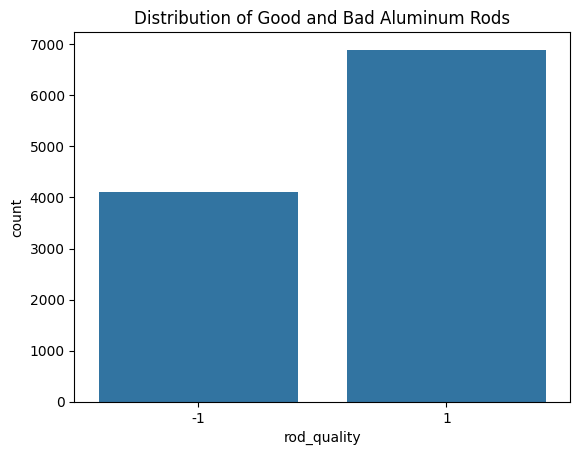

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'rod_quality'
sns.countplot(x='rod_quality',data = df)
plt.title('Distribution of Good and Bad Aluminum Rods')
plt.show()


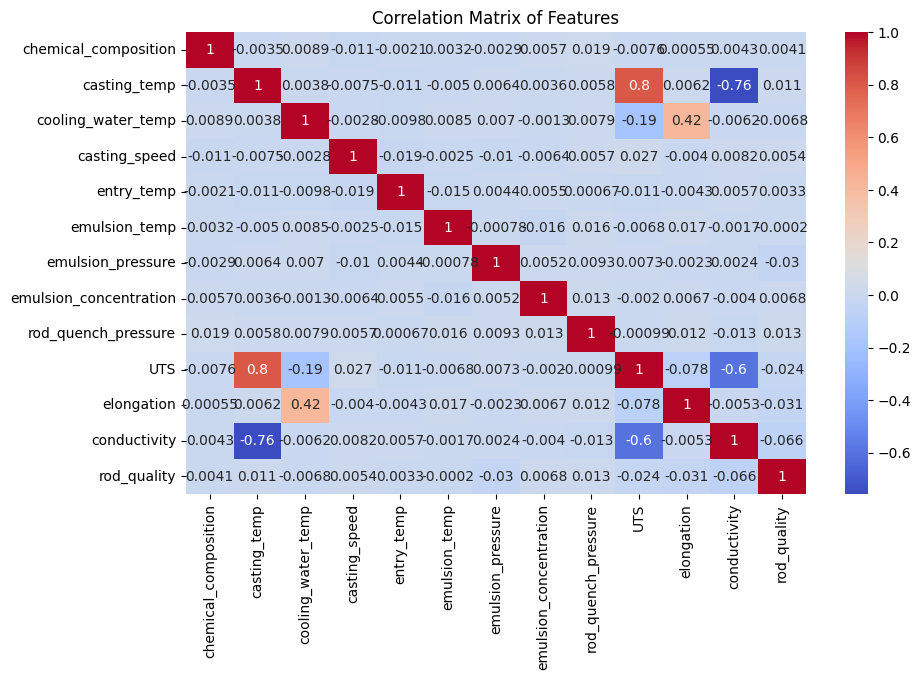

In [38]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


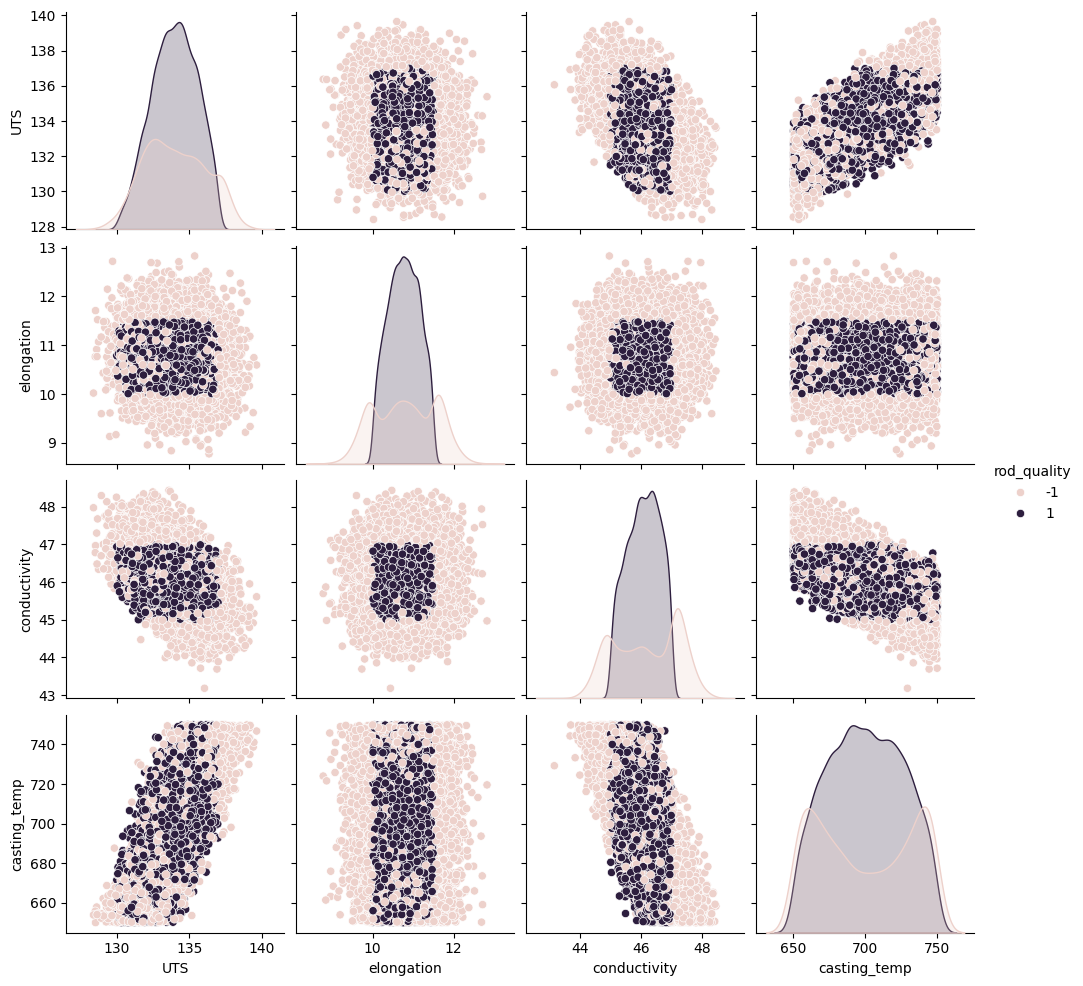

In [39]:
# Pairplot for selected features
sns.pairplot(df[['UTS', 'elongation', 'conductivity', 'casting_temp', 'rod_quality']], hue='rod_quality')
plt.show()


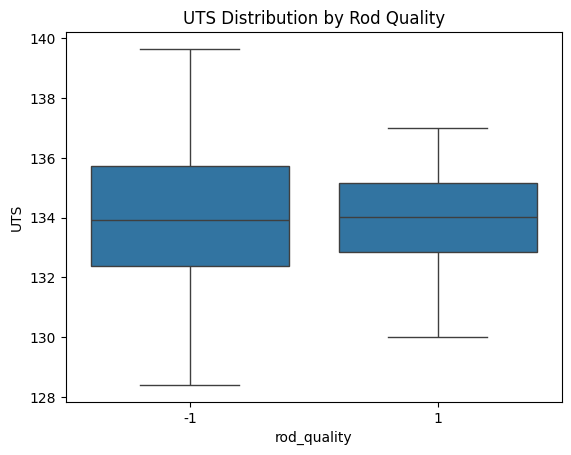

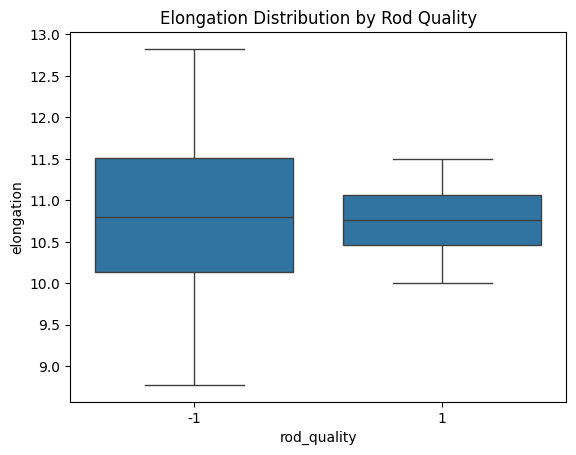

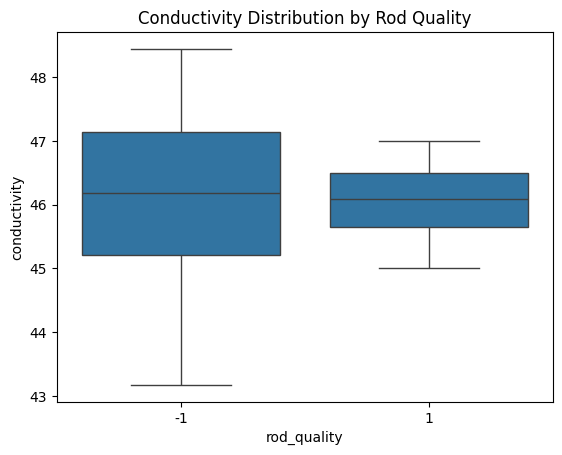

In [40]:
# Boxplot for UTS based on rod quality
sns.boxplot(x='rod_quality', y='UTS', data=df)
plt.title('UTS Distribution by Rod Quality')
plt.show()

# Boxplot for elongation based on rod quality
sns.boxplot(x='rod_quality', y='elongation', data=df)
plt.title('Elongation Distribution by Rod Quality')
plt.show()

# Boxplot for conductivity based on rod quality
sns.boxplot(x='rod_quality', y='conductivity', data = df)
plt.title('Conductivity Distribution by Rod Quality')
plt.show()


In [54]:
# Let's build multiple machine learning models to predict the 'rod_quality' (Good/Bad).
# We will use models such as Logistic Regression, Random Forest, and Gradient Boosting.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features and target variable
X = df.drop(['rod_quality'], axis=1)
y = df['rod_quality']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

accuracy_scores


{'Logistic Regression': 0.6290909090909091,
 'Random Forest': 0.9995454545454545,
 'Gradient Boosting': 1.0}

In [52]:
print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((8800, 12), (8800,))
test set: ((2200, 12), (2200,))
